In [1]:
import os
import pandas as pd
import seaborn as sns

import wrangle
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Mask for United Airlines

In [8]:
flights = wrangle.pull_airline_data('UA')

In [9]:
flights.OP_CARRIER.value_counts()

UA    752467
Name: OP_CARRIER, dtype: int64

In [4]:
flights

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
0,2009-01-01,UA,26,LAX,JFK,0.0,0.0,0.0,0.0,45.0,45.0
1,2009-01-01,UA,43,DEN,HNL,0.0,0.0,0.0,0.0,162.0,162.0
2,2009-01-01,UA,71,DEN,OGG,130.0,0.0,0.0,0.0,0.0,130.0
3,2009-01-01,UA,73,SFO,HNL,20.0,0.0,0.0,0.0,0.0,20.0
4,2009-01-01,UA,95,EWR,SFO,41.0,0.0,8.0,0.0,0.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...
752462,2019-12-31,UA,299,DEN,ANC,9.0,0.0,21.0,0.0,0.0,30.0
752463,2019-12-31,UA,288,PHX,EWR,8.0,0.0,0.0,0.0,96.0,104.0
752464,2019-12-31,UA,282,EWR,DEN,31.0,0.0,0.0,0.0,0.0,31.0
752465,2019-12-31,UA,260,SEA,IAD,0.0,0.0,0.0,0.0,43.0,43.0


In [5]:
df = wrangle.clean_flight_data_for_average_daily_delay(flights)

/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:103: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flights_monthly_mean = flights.resample('M').mean().total_delays
/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:109: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flights_daily_mean = pd.DataFrame(flights.resample('D').mean().total_delays)
/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:124: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future versi

In [6]:
col_to_sum = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']


In [7]:
top_15_hubs = ['ATL',
'DFW',
'DEN',
'ORD',
'LAX',
'JFK',
'IAH',
'PHX',
'EWR',
'SFO',
'SEA',
'IAD',
'PHL',
'CLT',
'MIA']

In [7]:
flights.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
0,2009-01-01,UA,26,LAX,JFK,0.0,0.0,0.0,0.0,45.0,45.0
1,2009-01-01,UA,43,DEN,HNL,0.0,0.0,0.0,0.0,162.0,162.0
2,2009-01-01,UA,71,DEN,OGG,130.0,0.0,0.0,0.0,0.0,130.0
3,2009-01-01,UA,73,SFO,HNL,20.0,0.0,0.0,0.0,0.0,20.0
4,2009-01-01,UA,95,EWR,SFO,41.0,0.0,8.0,0.0,0.0,49.0


 ### Data Types, Shape

In [20]:
flights.shape

(752467, 11)

In [21]:
# seeing all my data types
flights.dtypes


FL_DATE                datetime64[ns]
OP_CARRIER                     object
OP_CARRIER_FL_NUM               int64
ORIGIN                         object
DEST                           object
CARRIER_DELAY                 float64
WEATHER_DELAY                 float64
NAS_DELAY                     float64
SECURITY_DELAY                float64
LATE_AIRCRAFT_DELAY           float64
row_sums                      float64
dtype: object

In [22]:
# shows the categories for all the columns 
for col in df:
    print(df[col].value_counts())

101.509765    31
82.924974     31
52.500000      4
44.000000      3
55.142857      3
              ..
66.034483      1
56.785714      1
43.477876      1
56.414414      1
41.576271      1
Name: average_delay, Length: 3902, dtype: int64


In [7]:
df.head()

,average_delay
FL_DATE,
2009-01-01,9.476331
2009-01-02,14.867114
2009-01-03,10.870654
2009-01-04,6.481283
2009-01-05,8.797844


## Statistical Summary

In [8]:
flights.describe()

,OP_CARRIER_FL_NUM,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,sum_rows
count,3.725571e+06,3.725571e+06,3.725571e+06,3.725571e+06,3.725571e+06,3.725571e+06,3.725571e+06
mean,9.536500e+02,3.623365e+00,5.865157e-01,3.317224e+00,5.332069e-03,5.132905e+00,9.663154e+02
std,5.999682e+02,1.941433e+01,9.847467e+00,1.560652e+01,7.080802e-01,2.445621e+01,6.018641e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,4.540000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.650000e+02
50%,7.790000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.930000e+02
75%,1.471000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.482000e+03
max,2.833000e+03,1.405000e+03,1.239000e+03,1.041000e+03,3.490000e+02,1.365000e+03,3.718000e+03


In [11]:
list_of_airports = flights['ORIGIN'].value_counts()
list_of_airports = pd.DataFrame(list_of_airports)
list_of_airports.nunique()

ORIGIN    15
dtype: int64

In [12]:
list_of_airports.head(15)

,ORIGIN
ORD,169283
SFO,111971
DEN,109842
EWR,99459
IAH,96804
LAX,54801
IAD,48113
SEA,17170
PHX,9631
PHL,8546


## Spitting the data

In [79]:
# Split the data
train = df.iloc[:2016] 
test = df.iloc[2016:] 
train.loc['2009-09-30':]

,average_delay
FL_DATE,
2009-09-30,61.647059
2009-10-01,82.924974
2009-10-02,82.924974
2009-10-03,82.924974
2009-10-04,82.924974
...,...
2014-07-05,52.463636
2014-07-06,53.028846
2014-07-07,50.975862


## Sum of Delay Grouped by Date

In [31]:
# Sum the delays grouped by dates
flights.groupby('FL_DATE')[col_to_sum].sum()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
FL_DATE,,,,,
2009-01-01,2341.0,109.0,875.0,0.0,3081.0
2009-01-02,2964.0,24.0,3170.0,0.0,4918.0
2009-01-03,2461.0,115.0,1582.0,0.0,3658.0
2009-01-04,1561.0,386.0,731.0,0.0,2170.0
2009-01-05,1692.0,223.0,1259.0,0.0,3354.0
...,...,...,...,...,...
2019-12-27,3415.0,96.0,1026.0,0.0,3705.0
2019-12-28,4580.0,455.0,6719.0,0.0,12118.0
2019-12-29,7337.0,1333.0,2942.0,0.0,11893.0


## Max Sum values grouped by Date

In [32]:
# Max values of Sum the delays grouped by dates
flights.groupby('FL_DATE')[col_to_sum].sum().max()

CARRIER_DELAY          33733.0
WEATHER_DELAY          20679.0
NAS_DELAY              20121.0
SECURITY_DELAY          3149.0
LATE_AIRCRAFT_DELAY    46200.0
dtype: float64

## Mean values grouped by Mean

In [60]:
# Mean values grouped by Date
mean_group = flights.groupby('FL_DATE')[col_to_sum].mean()
mean_group

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
FL_DATE,,,,,
2009-01-01,18.728000,0.872000,7.000000,0.0,24.648000
2009-01-02,18.409938,0.149068,19.689441,0.0,30.546584
2009-01-03,16.516779,0.771812,10.617450,0.0,24.550336
2009-01-04,14.063063,3.477477,6.585586,0.0,19.549550
2009-01-05,12.000000,1.581560,8.929078,0.0,23.787234
...,...,...,...,...,...
2019-12-27,20.950920,0.588957,6.294479,0.0,22.730061
2019-12-28,13.313953,1.322674,19.531977,0.0,35.226744
2019-12-29,24.294702,4.413907,9.741722,0.0,39.380795


In [66]:
mean_group.index

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08',
               '2009-01-09', '2009-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='FL_DATE', length=3955, freq=None)

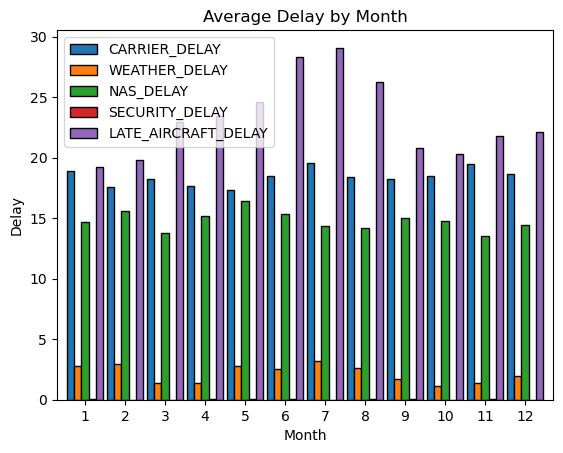

In [69]:
ax = mean_group.groupby(mean_group.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Delay by Month', xlabel='Month', ylabel='Avg. Minute Delay')
plt.show()

In [59]:
# Max mean value grouped by Date
flights.groupby('FL_DATE')[col_to_sum].mean().max()

CARRIER_DELAY          88.151786
WEATHER_DELAY          52.325581
NAS_DELAY              56.481707
SECURITY_DELAY         25.071429
LATE_AIRCRAFT_DELAY    73.923483
dtype: float64

## Sum values grouped by Origin

In [34]:
flights.groupby('ORIGIN')[col_to_sum].sum()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
ORIGIN,,,,,
ATL,72298.0,13251.0,193845.0,19.0,163123.0
CLT,30805.0,3385.0,39279.0,0.0,36473.0
DEN,1695481.0,333454.0,1770002.0,1054.0,2765183.0
DFW,132900.0,29603.0,217858.0,171.0,248538.0
EWR,1914576.0,366547.0,1625823.0,5357.0,2688786.0
IAD,925243.0,236819.0,945105.0,3050.0,1011597.0
IAH,1749253.0,404286.0,1594368.0,604.0,2130958.0
JFK,67915.0,15862.0,143905.0,744.0,77278.0
LAX,1022315.0,21204.0,914685.0,6507.0,1328374.0


## Mean values grouped by Origin

In [75]:
origin_group = flights.groupby('ORIGIN')[col_to_sum].mean()
origin_group

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
ORIGIN,,,,,
ATL,12.212500,2.238345,32.744088,0.003209,27.554561
CLT,21.481869,2.360530,27.391213,0.000000,25.434449
DEN,15.435635,3.035760,16.114073,0.009596,25.174187
DFW,16.421599,3.657852,26.919313,0.021129,30.710243
EWR,19.249902,3.685408,16.346665,0.053861,27.034115
IAD,19.230624,4.922142,19.643444,0.063392,21.025440
IAH,18.070049,4.176336,16.470063,0.006239,22.013119
JFK,12.965827,3.028255,27.473272,0.142039,14.753341
LAX,18.655043,0.386927,16.691028,0.118739,24.239959


In [77]:
origin_group.sort_values(by='LATE_AIRCRAFT_DELAY', ascending=False)


,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
ORIGIN,,,,,
DFW,16.421599,3.657852,26.919313,0.021129,30.710243
ATL,12.212500,2.238345,32.744088,0.003209,27.554561
SFO,19.738986,0.538291,11.346349,0.009735,27.102625
ORD,17.694907,3.673429,15.738373,0.003781,27.068696
EWR,19.249902,3.685408,16.346665,0.053861,27.034115
PHL,17.101802,3.709455,22.880178,0.033115,26.733911
PHX,15.017028,1.307964,24.517911,0.000623,26.066867
CLT,21.481869,2.360530,27.391213,0.000000,25.434449
DEN,15.435635,3.035760,16.114073,0.009596,25.174187


In [ ]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')


### A look at histograms

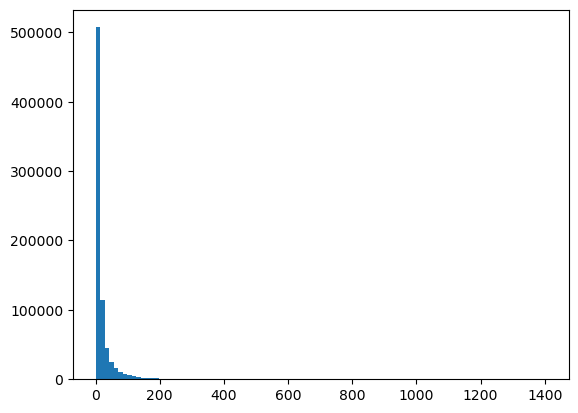

In [52]:
plt.hist(flights.CARRIER_DELAY, bins=100)
plt.show()

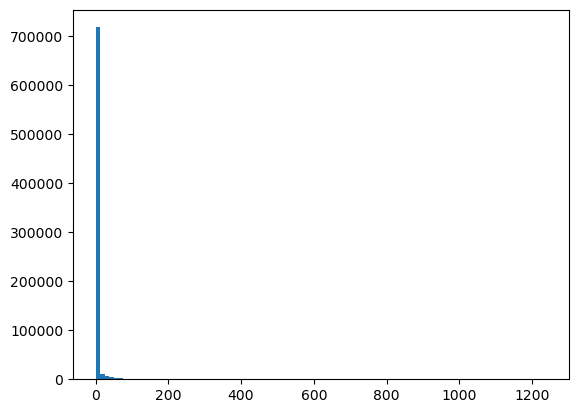

In [53]:
plt.hist(flights.WEATHER_DELAY, bins=100)
plt.show()

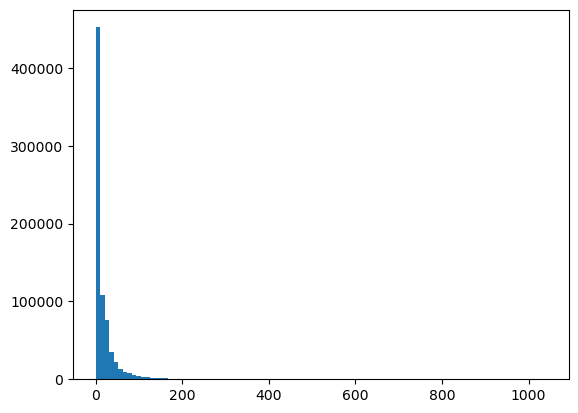

In [54]:
plt.hist(flights.NAS_DELAY, bins=100)
plt.show()

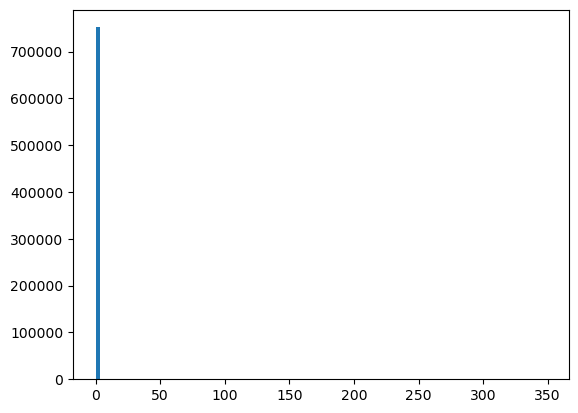

In [56]:
plt.hist(flights.SECURITY_DELAY, bins=100)
plt.show()

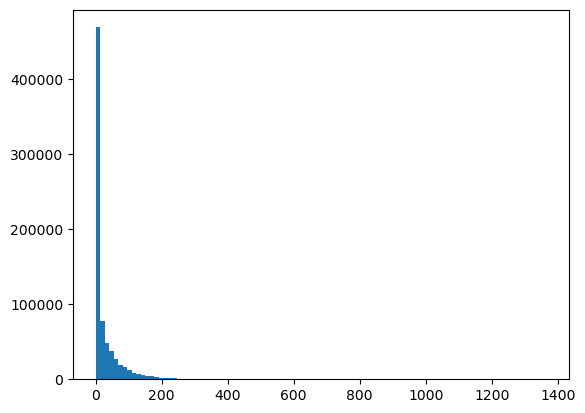

In [57]:
plt.hist(flights.LATE_AIRCRAFT_DELAY, bins=100)
plt.show()

### Find the best interval to define average delay by to optimize reducing noise while keeping good correlation results

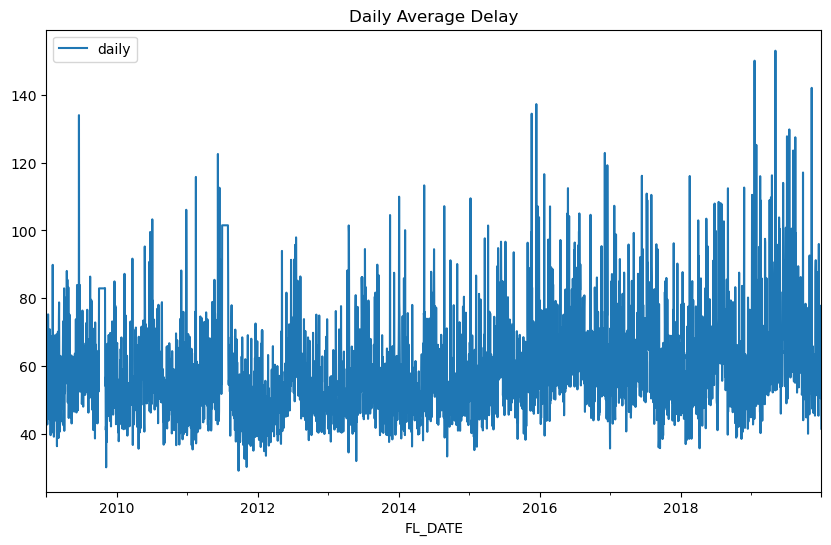

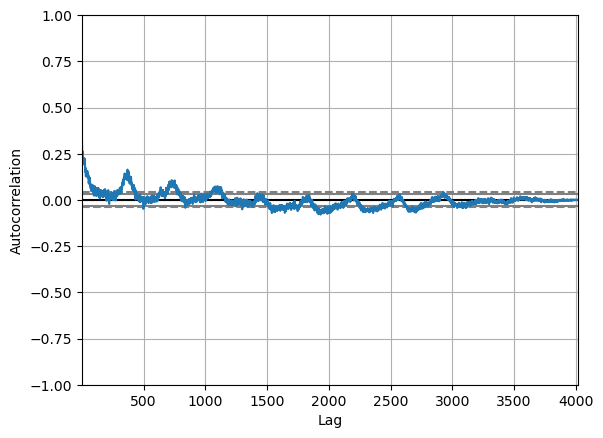

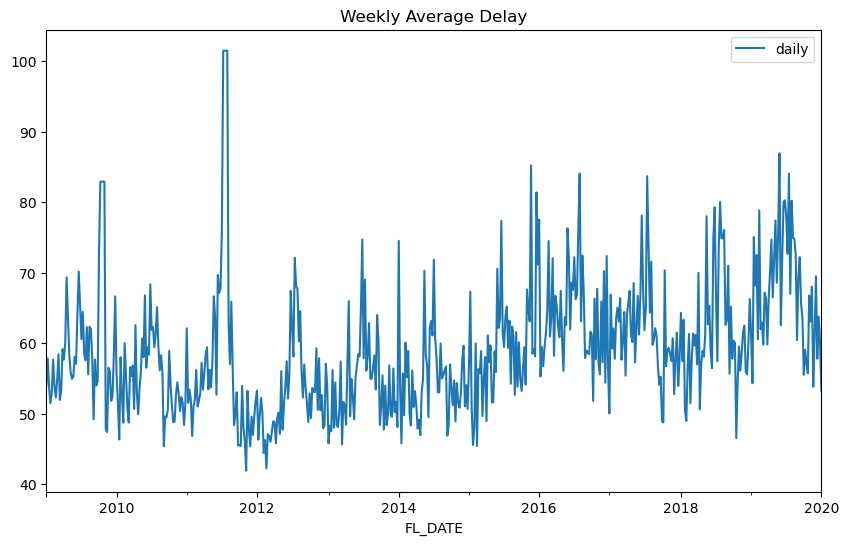

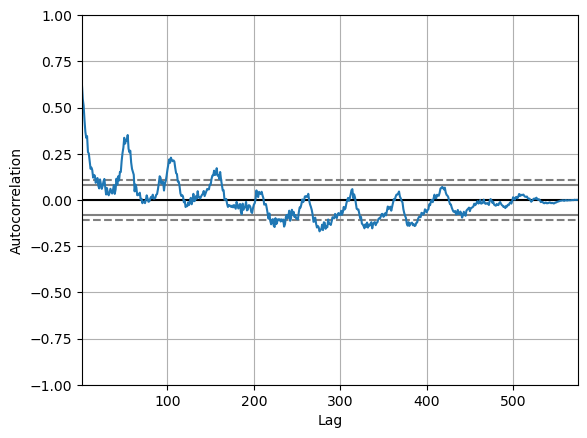

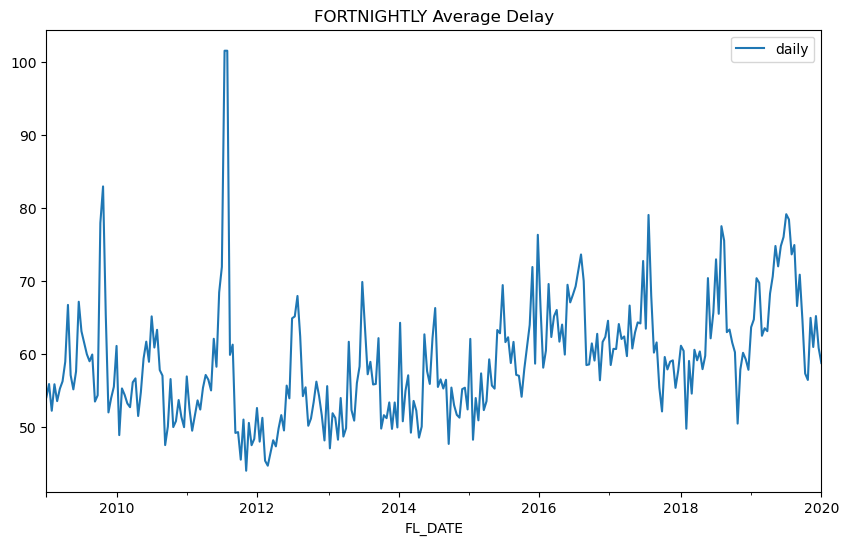

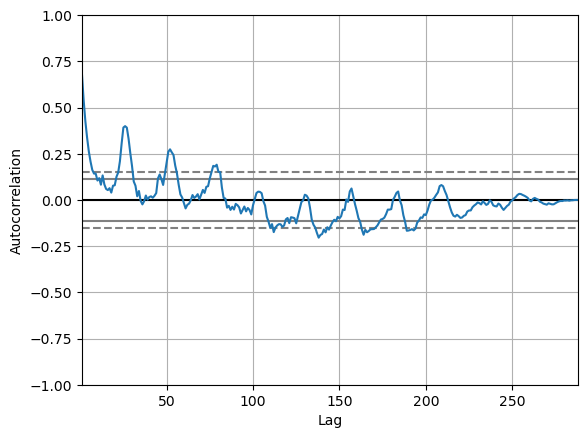

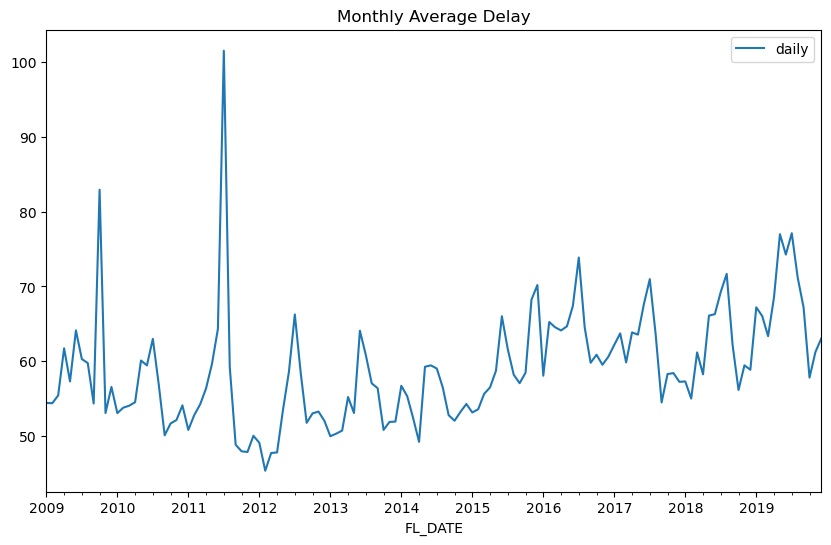

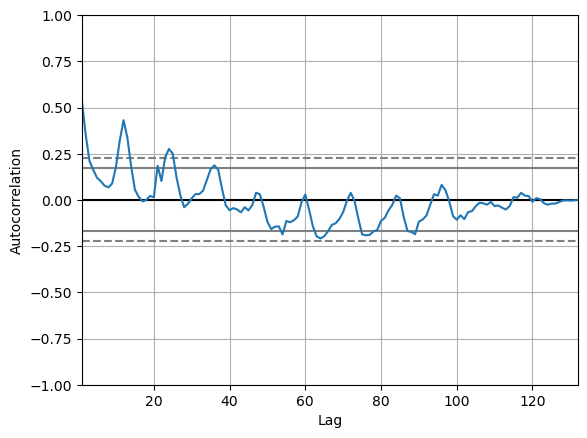

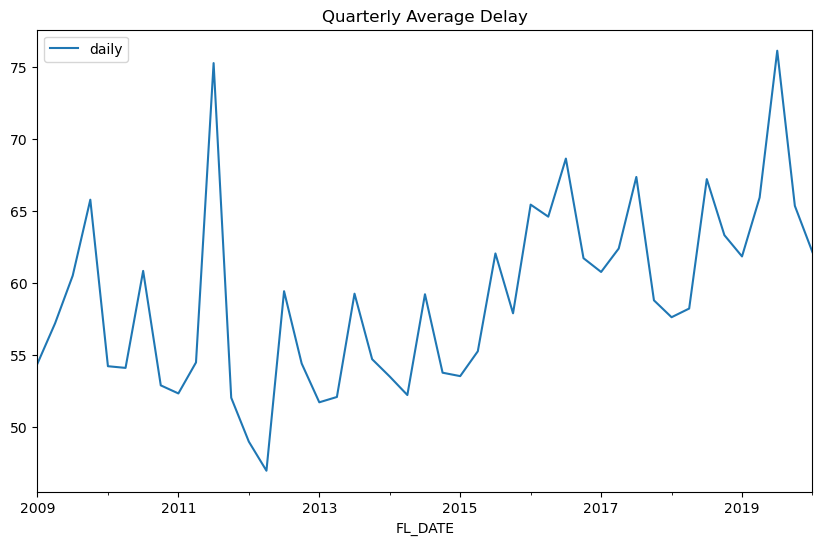

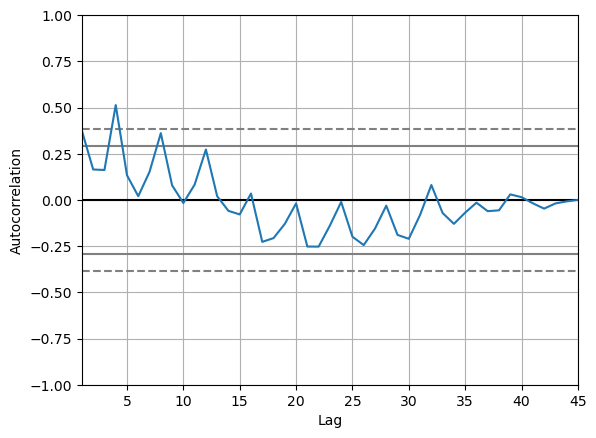

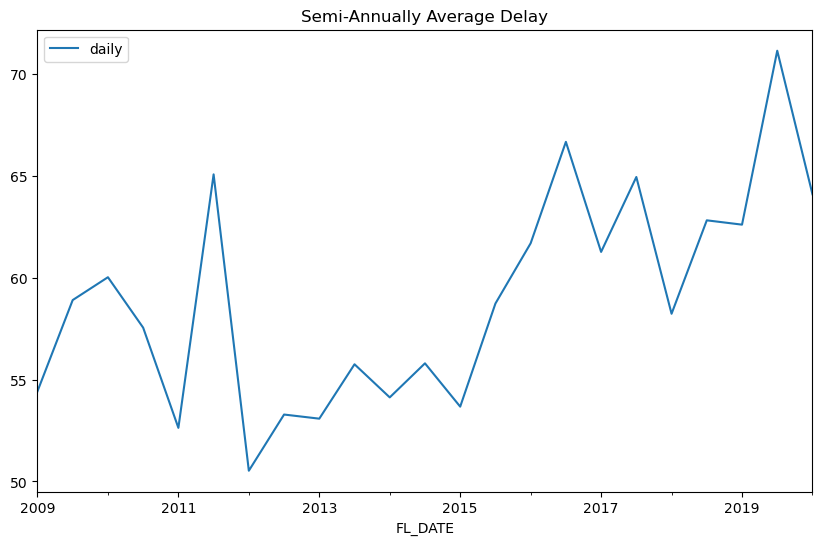

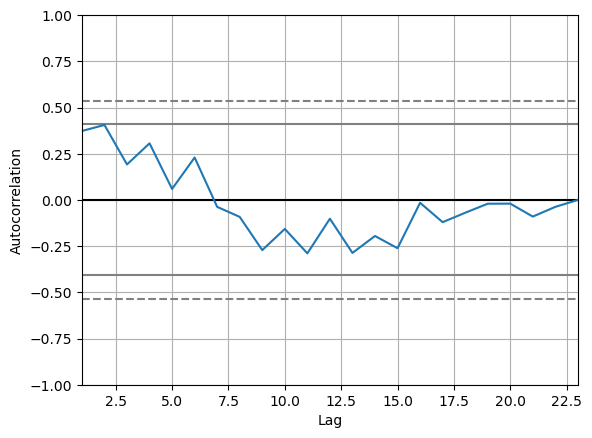

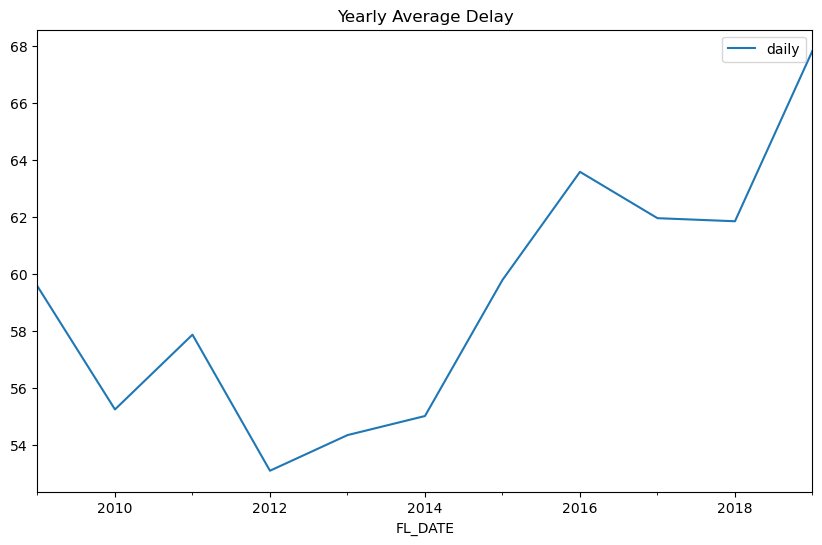

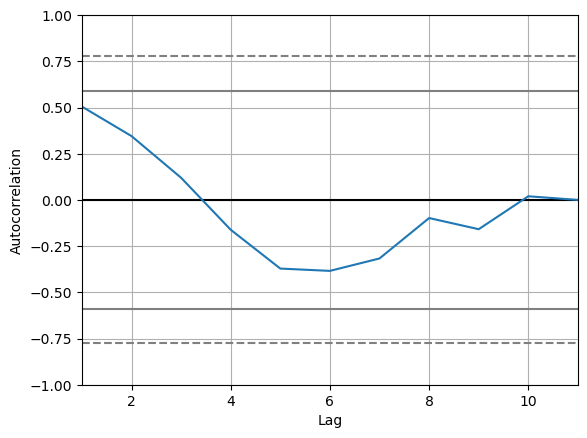

In [39]:
def plot_average_by_interval():
    
    resample_dict = {'D':'Daily', 'W':'Weekly', '2W':'FORTNIGHTLY', 'M':'Monthly', '3M':'Quarterly', '6M':'Semi-Annually', 'Y':'Yearly'}

    for _ in resample_dict:
        plt.figure(figsize=(10,6))

        df.resample(_).mean().average_delay.plot(label='daily')
        # flights_daily_mean.resample('W').mean().average_delay.plot(label='weekly')
        # flights_daily_mean.resample('M').mean().average_delay.plot(label='monthly')
        # flights_daily_mean.resample('Y').mean().average_delay.plot(label='yearly')


        plt.title(f'{resample_dict[_][0:]} Average Delay')
        plt.legend()
        plt.show()

        pd.plotting.autocorrelation_plot(df.average_delay.resample(_).mean())
        plt.show()

plot_average_by_interval()

### Plot the best lag plot based on the airline.  The best will always be 365

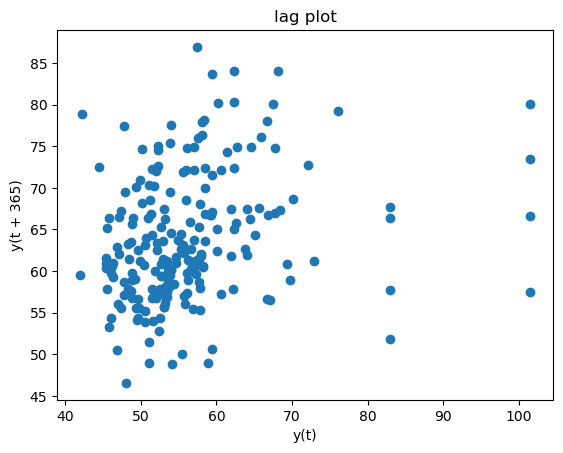

In [40]:
def plot_best_lag_plot():

    #Plots the best correlated lag
    pd.plotting.lag_plot(df.resample('W').mean(), lag=365)
    plt.title('lag plot');

plot_best_lag_plot()

### Split the data by year

In [41]:
train = df.iloc[:2016] 
test = df.iloc[2016:] 
train.loc['2009-09-30':]

,average_delay
FL_DATE,
2009-09-30,61.647059
2009-10-01,82.924974
2009-10-02,82.924974
2009-10-03,82.924974
2009-10-04,82.924974
...,...
2014-07-05,52.463636
2014-07-06,53.028846
2014-07-07,50.975862


In [42]:
test

,average_delay
FL_DATE,
2014-07-10,53.864754
2014-07-11,58.533632
2014-07-12,65.600000
2014-07-13,62.201613
2014-07-14,77.250667
...,...
2019-12-27,50.564417
2019-12-28,69.395349
2019-12-29,77.831126


### Plot the seasonal decompositions for the various time periods

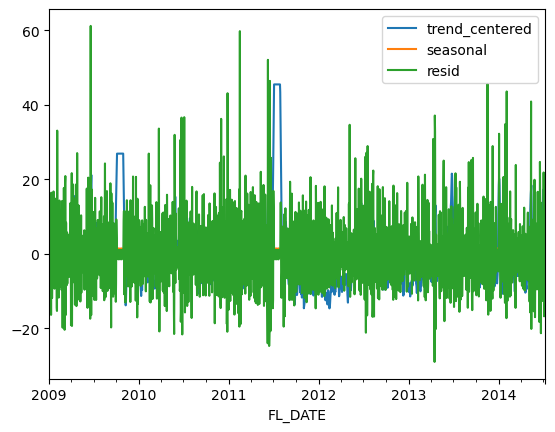

In [43]:
y = train.average_delay.resample('d').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

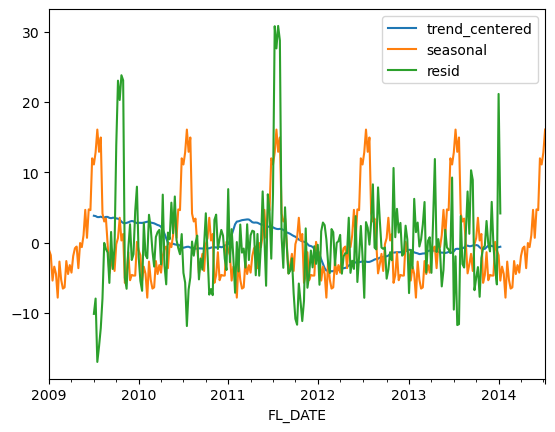

In [44]:
y = train.average_delay.resample('w').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

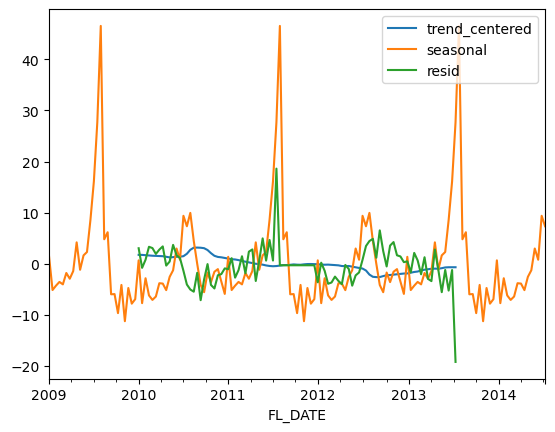

In [45]:
def seasonal_decomposition_plot(duration):
    y = train.average_delay.resample(duration).mean()

    result = sm.tsa.seasonal_decompose(y)

    decomposition = pd.DataFrame({
        'y': result.observed,
        'trend': result.trend,
        'seasonal': result.seasonal,
        'resid': result.resid
    })

    decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
    decomposition[['trend_centered', 'seasonal', 'resid']].plot();
    
seasonal_decomposition_plot('2w')

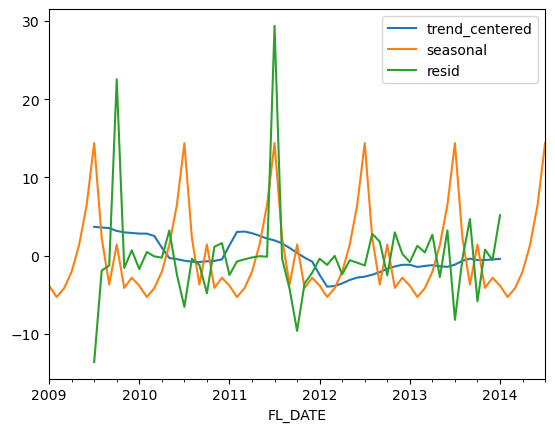

In [46]:
y = train.average_delay.resample('m').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

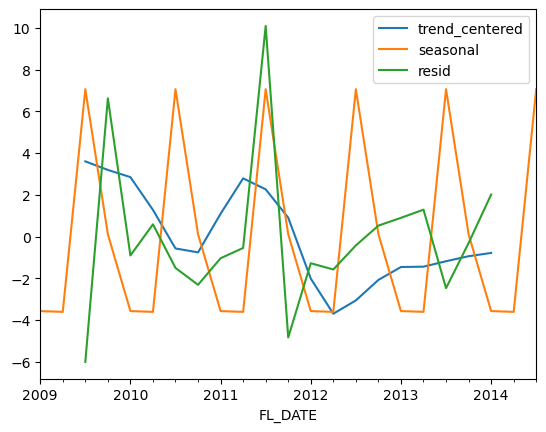

In [47]:
y = train.average_delay.resample('3m').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

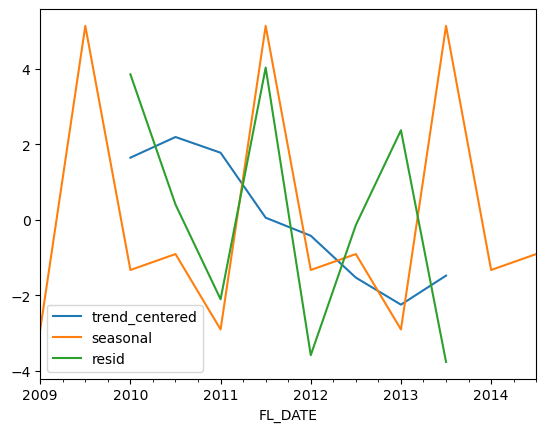

In [48]:
y = train.average_delay.resample('6m').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

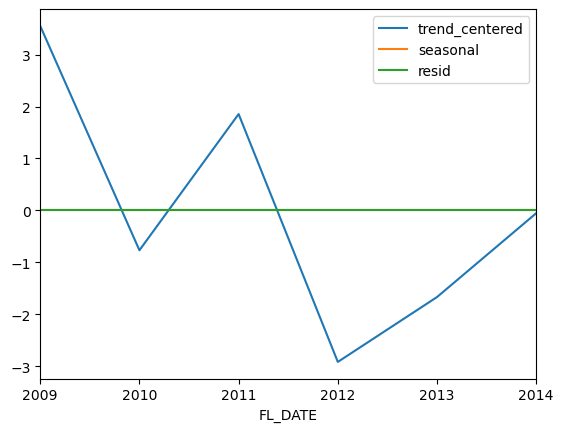

In [49]:
y = train.average_delay.resample('y').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

### Once again the best period to resample by seems to be 2 weeks or a fortnight